# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu: IAD13 <br>
Członkowie: Zuzanna Brauer. Sandra Głowacka, Zuzanna Chmielarska

---

## Zestaw zadań 5: Weryfikacja hipotez statystycznych (Notatnik 1/2)

In [3]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Funkcje do wykorzystania

In [4]:
def vizualize_test_result(pdf, statistic, rejection_region):
    """
    Parameters
    -------
    pdf: pandas.DataFrame
        Tablica zawierająca informacje niezbędne do wykreślenia funkcji gęstości prawdopodobieństwa wykorzystywanego w teście rozkładu
        teoretycznego - index z wariantami zmiennej losowej i nadaną nazwą zmiennej (np. x) oraz pojedynczą kolumnę z wartościami
        gęstościami prawdopodobieństwa wyliczonymi dla poszczególnych wariantów o nadanej nazwie bazującej na nazwie zmiennej (np. f(x)).
    statistic: float
        Wartość statystyki testowej wyliczonej na podstawie próby losowej.
    rejection_region: list
        Lista zawierająca trzy elementy pozwalające na określenie obszaru krytycznego w następującej kolejności:
         - wartość dolnej granicy przedziału,
         - wartość górnej granicy przedziału,
         - "inner" lub "outer" w zależności od tego, czy ma być zakolorowana wewnętrzna, czy zewnętrzna część przedziału.
    """
    pdf_name= pdf.columns[0]
    
    fig, axes = plt.subplots(1, 1, figsize=(8, 3), facecolor='white')

    axes.plot(pdf.index, pdf[pdf_name], color="grey")

    if rejection_region[2]=="inner":
        axes.fill_between(pdf.index, pdf[pdf_name], 0, where=((pdf.index > rejection_region[0]) & (pdf.index<rejection_region[1])), color='red', alpha=0.5)
    elif rejection_region[2]=="outer":
        axes.fill_between(pdf.index, pdf[pdf_name], 0, where=((pdf.index < rejection_region[0]) | (pdf.index>rejection_region[1])), color='red', alpha=0.5)
    
    axes.vlines(x=statistic, ymin=0, ymax=np.max(pdf[pdf_name]/3), color="blue")
    
    axes.set_xlabel(pdf.index.name)
    axes.set_ylabel(pdf_name)

### Dane do zadań 1-3

W celu wygenerowania danych wykorzystywanych w zawartych w notatniku komórkach testowych wykonaj obie poniższe komórki.

In [5]:
test_data_1 = pd.DataFrame(data=sp.stats.norm.rvs(loc=5, scale=0.2, size=15, random_state=7), columns=["X"])
test_data_1.head()

,X
0,5.338105
1,4.906813
2,5.006564
3,5.081503
4,4.842215


In [6]:
test_data_2 = pd.DataFrame(data=sp.stats.norm.rvs(loc=-0.15, scale=0.2, size=100, random_state=12)>0, columns=["X"])
test_data_2.head()

,X
0,False
1,False
2,False
3,False
4,True


### Zadanie 1: Weryfikacja hipotezy o wartości przeciętnej [7 pkt]

Przygotuj funkcję `mean_NHST()`, która będzie weryfikować hipotezę o wartości przeciętnej i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w dołączonym do notatnika zestawie wzorów, w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna wykorzystywać udostępnioną na początku notatnika funkcję `vizualize_test_result()` do generowania wykresu zawierającego:
- funkcję gęstości prawdopodobieństwa rozkładu teoretycznego wykorzystywanego w teście w zakresie od wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.0001 do wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.9999,
- zaznaczony wyróżniającym się kolorem fragmentem pola pod krzywą odpowiadający wyznaczonemu w teście obszarowi krytycznemu,
- wyróżniającą się kolorem pionowę linię wskazującą obliczoną wartość statystyki.

In [7]:
def mean_NHST(data, H0, H1, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i kolumnę "X" wynikami próby losowej.
    H0: float
        Wartość przeciętna przyjęta jako hipoteza zerowa.
    H1: str
        Postać hipotezy alternatywnej, przyjmuje wartości:
        - two-sided: wartość przeciętna jest różna od wartości przyjętej w H0,
        - less: wartość przeciętna jest mniejsza od wartości przyjętej w H0,
        - greater: wartość przeciętna jest większa od wartości przyjętej w H0.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    t: float
        Wyliczona na podstawie próby losowej wartość statystyki t.
    t_alpha: float
        Wartość statystyki t_alpha.
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    mean_value=data['X'].mean()
    std_value=data['X'].std()
    n=len(data)

    t=(mean_value-H0)/std_value*np.sqrt(n)

    if H1 == 'two-sided':
        t_alpha=sp.stats.t.ppf(1-alpha/2,df=n-1)
        if abs(t)<t_alpha:
            H=0
        else:
            H=1
        rejection_region = [-t_alpha, t_alpha, "outer"]
    elif H1 == 'less':
        t_alpha=sp.stats.t.ppf(alpha,df=n-1)
        if t>t_alpha:
            H=0
        else:
            H=1
        rejection_region = [-np.inf, t_alpha, "inner"]
    elif H1 == 'greater':
        t_alpha=sp.stats.t.ppf(1-alpha,df=n-1)
        if t<t_alpha:
            H=0
        else:
            H=1
        rejection_region = [t_alpha, np.inf, "inner"]
            
    x = np.linspace(sp.stats.t.ppf(0.0001, df=n-1), sp.stats.t.ppf(0.9999, df=n-1), 1000)
    y = sp.stats.t.pdf(x,df=n-1)
    pdf = pd.DataFrame({ 'x': x, 'f(x)': y }).set_index('x')

    vizualize_test_result(pdf, t, rejection_region)
    
    return t, t_alpha, H

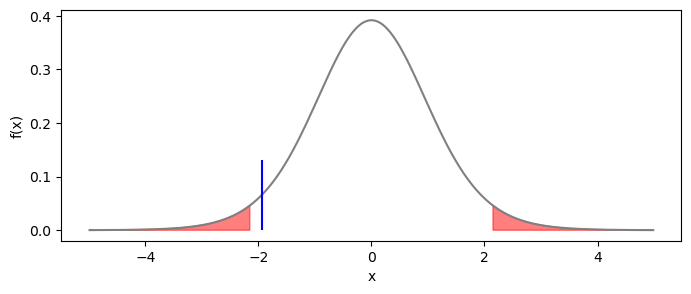

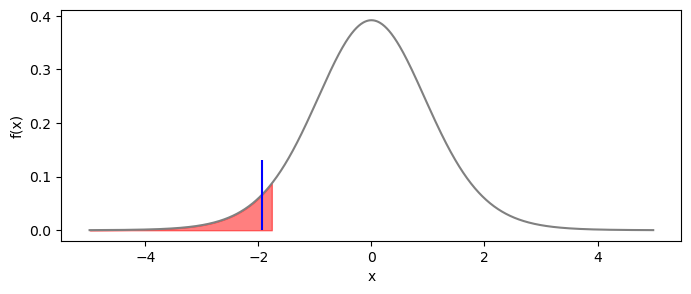

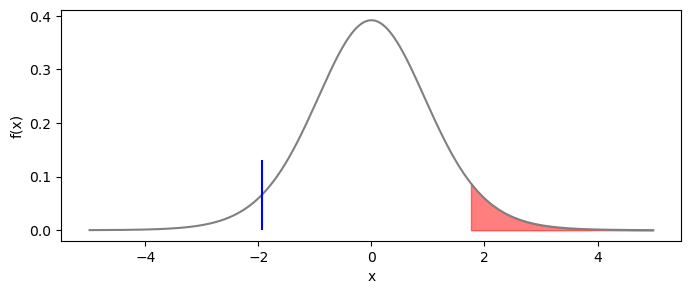

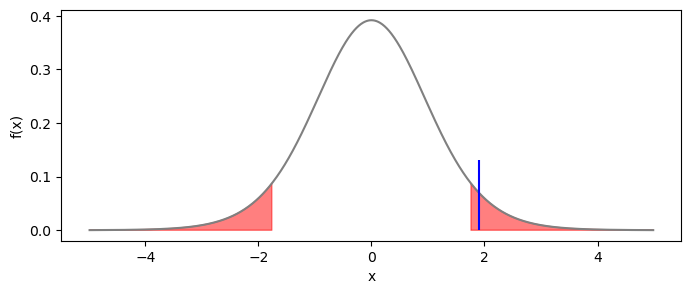

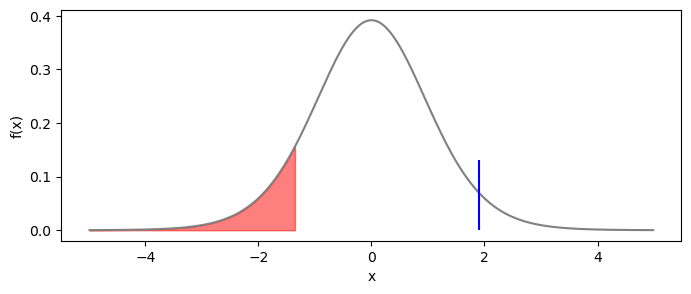

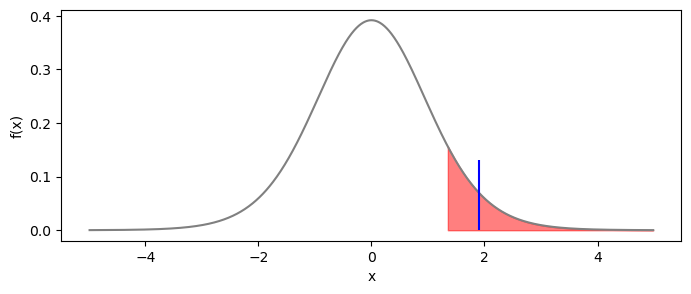

In [8]:
### Komórka testowa
assert np.all(np.isclose(mean_NHST(test_data_1, 5.08, "two-sided", 0.05), (-1.9346677837081263, 2.1447866879169273, 0)))
assert np.all(np.isclose(mean_NHST(test_data_1, 5.08, "less", 0.05), (-1.9346677837081263, -1.7613101357748564, 1)))
assert np.all(np.isclose(mean_NHST(test_data_1, 5.08, "greater", 0.05), (-1.9346677837081263, 1.7613101357748562, 0)))

assert np.all(np.isclose(mean_NHST(test_data_1, 4.92, "two-sided", 0.1), (1.8994107469740968, 1.7613101357748562, 1)))
assert np.all(np.isclose(mean_NHST(test_data_1, 4.92, "less", 0.1), (1.8994107469740968, -1.3450303744546486, 0)))
assert np.all(np.isclose(mean_NHST(test_data_1, 4.92, "greater", 0.1), (1.8994107469740968, 1.345030374454649, 1)))

### Zadanie 2: Weryfikacja hipotezy o wariancji [7 pkt]

Przygotuj funkcję `variance_NHST()`, która będzie weryfikować hipotezę o wartości wariancji i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w dołączonym do notatnika zestawie wzorów, w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna wykorzystywać udostępnioną na początku notatnika funkcję `vizualize_test_result()` do generowania wykresu zawierającego:
- funkcję gęstości prawdopodobieństwa rozkładu teoretycznego wykorzystywanego w teście w zakresie od wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.0001 do wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.9999,
- zaznaczony wyróżniającym się kolorem fragmentem pola pod krzywą odpowiadający wyznaczonemu w teście obszarowi krytycznemu,
- wyróżniającą się kolorem pionowę linię wskazującą obliczoną wartość statystyki.

In [9]:
def variance_NHST(data, H0, H1, alpha):
    """
    Parameters
    -------
    data: DataFrame
        DataFrame containing the default index and the "X" column with the results of a random sample.
    H0: float
        Variance value assumed as the null hypothesis.
    H1: str
        Form of the alternative hypothesis, accepts values:
        - two-sided: variance is different from the value assumed in H0,
        - less: variance is less than the value assumed in H0,
        - greater: variance is greater than the value assumed in H0.
    alpha: float
        Value determining the significance level.
    
    Returns
    -------
    chi2: float
        The calculated chi-square statistic based on the random sample.
    chi2_alpha: float or list
        The chi-square statistic or a list with two chi-square statistics (chi2_alpha_1 and chi2_alpha_2).
    H: int
        The result of the statistical test, takes the value:
        0 - when the result of the significance test does not provide a basis for rejecting H0 in favor of H1 at the significance level 1-alpha,
        1 - when H0 is rejected in favor of H1 at the significance level 1-alpha.
    """
    variance_value=data['X'].var()
    n=len(data)

    chi2=(n-1)*variance_value/H0

    if H1=='two-sided':
        condition='chi2_alpha_1 < chi2 < chi2_alpha_2'
        chi2_alpha_1=sp.stats.chi2.ppf(alpha/2, df=n-1)
        chi2_alpha_2=sp.stats.chi2.ppf(1-alpha/2, df=n-1)
        chi2_alpha=[chi2_alpha_1, chi2_alpha_2]
        if chi2_alpha_1 < chi2 < chi2_alpha_2:
            H=0
        else:
            H=1
        rejection_region=[chi2_alpha_1, chi2_alpha_2, "outer"]
    elif H1=='less':
        condition='chi2 > chi2_alpha'
        chi2_alpha=sp.stats.chi2.ppf(alpha, df=n-1)
        if chi2>chi2_alpha:
            H=0
        else:
            H=1
        rejection_region=[-np.inf, chi2_alpha, "inner"]
    elif H1=='greater':
        condition='chi2 < chi2_alpha'
        chi2_alpha=sp.stats.chi2.ppf(1-alpha, df=n-1)
        if chi2<chi2_alpha:
            H=0
        else:
            H=1
        rejection_region=[chi2_alpha, np.inf, "inner"]

    x=np.linspace(sp.stats.chi2.ppf(0.0001, df=n-1), sp.stats.chi2.ppf(0.9999, df=n-1), 1000)
    y=sp.stats.chi2.pdf(x, df = n - 1)
    pdf=pd.DataFrame({ 'x': x, 'f(x)': y }).set_index('x')

    vizualize_test_result(pdf, chi2, rejection_region)

    return chi2, chi2_alpha, H

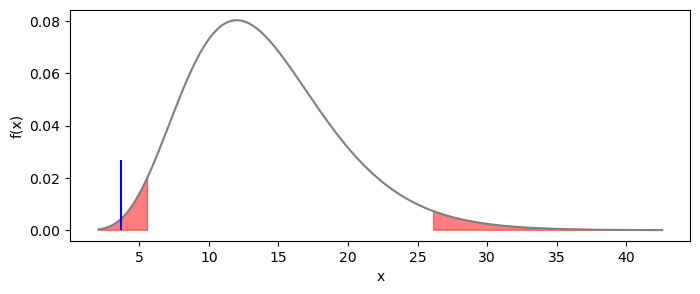

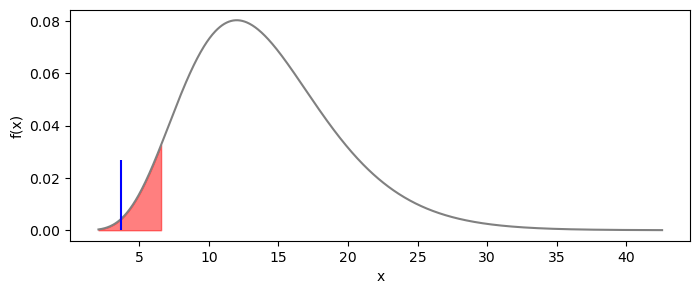

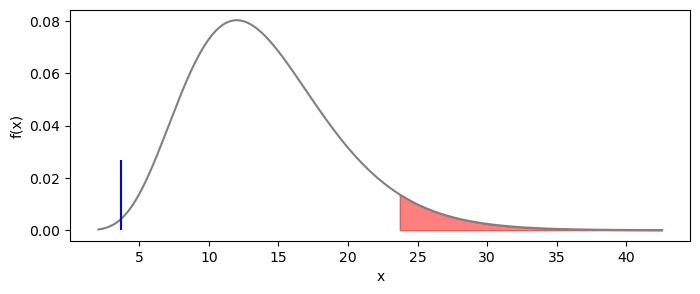

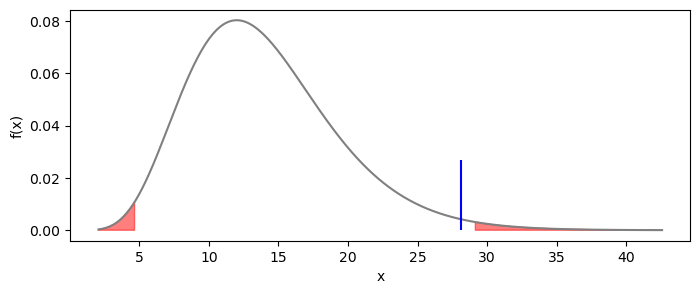

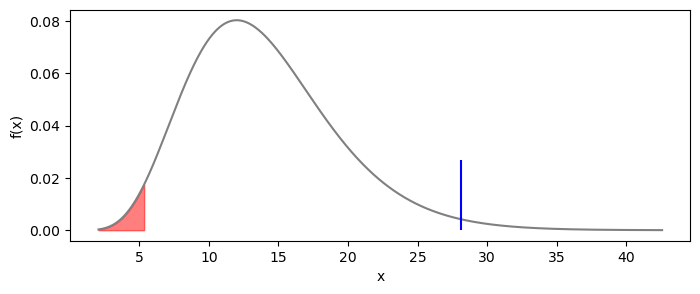

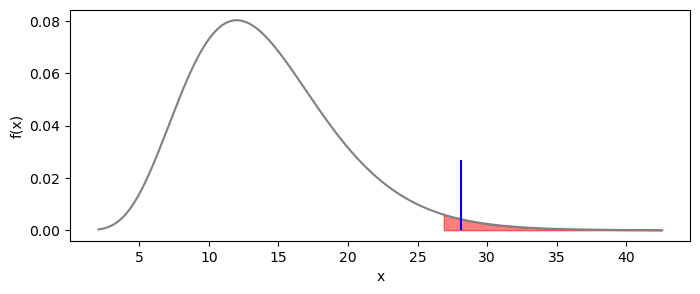

In [10]:
### Komórka testowa
results = variance_NHST(test_data_1, 0.1, "two-sided", 0.05)
assert np.all(np.isclose((results[0], results[1][0], results[1][1], results[2]), (3.657103504858619, 5.628726103039731, 26.11894804503737, 1)))
assert np.all(np.isclose(variance_NHST(test_data_1, 0.1, "less", 0.05), (3.657103504858619, 6.570631383789345, 1)))
assert np.all(np.isclose(variance_NHST(test_data_1, 0.1, "greater", 0.05), (3.657103504858619, 23.684791304840576, 0)))

results = variance_NHST(test_data_1, 0.013, "two-sided", 0.02)
assert np.all(np.isclose((results[0], results[1][0], results[1][1], results[2]), (28.13156542198938, 4.660425062657768, 29.141237740672796, 0)))
assert np.all(np.isclose(variance_NHST(test_data_1, 0.013, "less", 0.02), (28.13156542198938, 5.368197419889671, 0)))
assert np.all(np.isclose(variance_NHST(test_data_1, 0.013, "greater", 0.02), (28.13156542198938, 26.872764642314312, 1)))

### Zadanie 3: Weryfikacja hipotezy o wskaźniku struktury (proporcji) [7 pkt]

Przygotuj funkcję `proportion_NHST()`, która będzie weryfikować hipotezę o wartości wskaźnika struktury (proporcji) i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w dołączonym do notatnika zestawie wzorów, w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna wykorzystywać udostępnioną na początku notatnika funkcję `vizualize_test_result()` do generowania wykresu zawierającego:
- funkcję gęstości prawdopodobieństwa rozkładu teoretycznego wykorzystywanego w teście w zakresie od wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.0001 do wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.9999,
- zaznaczony wyróżniającym się kolorem fragmentem pola pod krzywą odpowiadający wyznaczonemu w teście obszarowi krytycznemu,
- wyróżniającą się kolorem pionowę linię wskazującą obliczoną wartość statystyki.

In [11]:
def proportion_NHST(data, H0, H1, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i kolumnę "X" wynikami próby losowej (True, False).
    H0: float
        Wartość wskaźnika struktury przyjęta jako hipoteza zerowa.
    H1: str
        Postać hipotezy alternatywnej, przyjmuje wartości:
        - two-sided: wartość wskaźnika struktury jest różna od wartości przyjętej w H0,
        - less: wartość wskaźnika struktury jest mniejsza od wartości przyjętej w H0,
        - greater: wartość wskaźnika struktury jest większa od wartości przyjętej w H0.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    u: float
        Wyliczona na podstawie próby losowej wartość statystyki u.
    u_alpha: float
        Wartość statystyki u_alpha.
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    mean_value=data['X'].mean()
    n=len(data)
    sqrt_value=np.sqrt(H0*(1-H0)/n)

    u=(mean_value-H0)/sqrt_value
    
    if H1 == 'two-sided':
        u_alpha=sp.stats.norm.ppf(1-alpha/2)
        if abs(u)<u_alpha:
            H=0
        else:
            H=1
        rejection_region=[-u_alpha, u_alpha, "outer"]
    elif H1 == 'less':
        u_alpha=sp.stats.norm.ppf(alpha)
        if u>u_alpha:
            H=0
        else:
            H=1
        rejection_region=[-np.inf, u_alpha, "inner"]
    elif H1 == 'greater':
        u_alpha=sp.stats.norm.ppf(1-alpha)
        if u<u_alpha:
            H=0
        else:
            H=1
        rejection_region=[u_alpha, np.inf, "inner"]

    x = np.linspace(sp.stats.norm.ppf(0.0001), sp.stats.norm.ppf(0.9999), 1000)
    y = sp.stats.norm.pdf(x)
    pdf = pd.DataFrame({'x': x, 'f(x)': y}).set_index('x')

    vizualize_test_result(pdf, u, rejection_region)

    return u, u_alpha, H

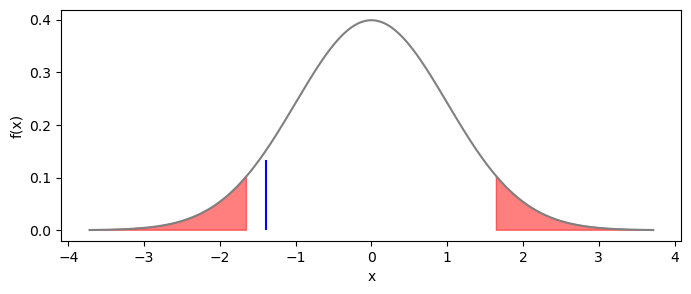

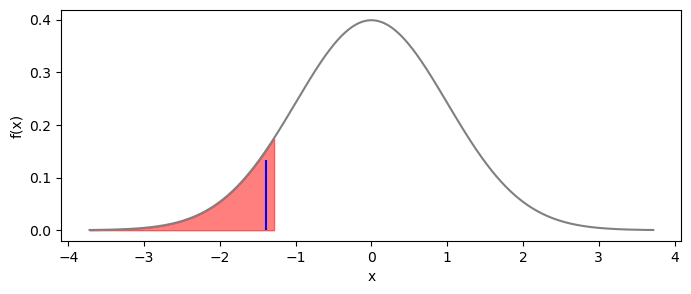

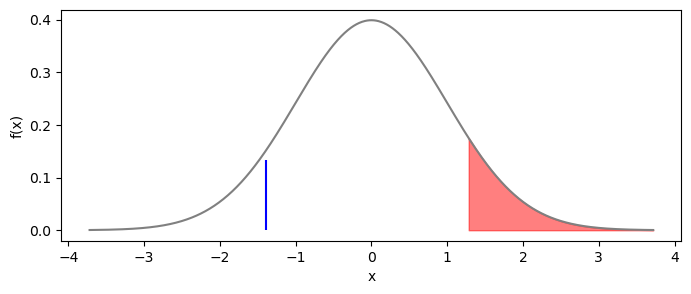

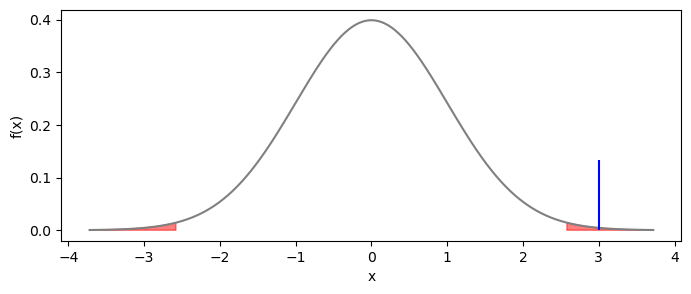

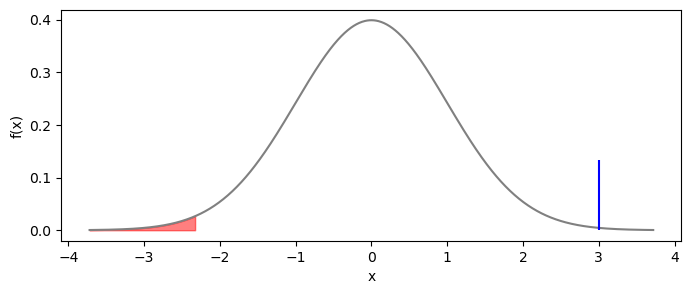

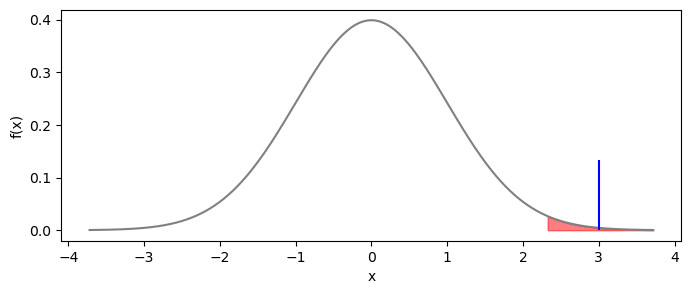

In [12]:
### Komórka testowa
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.25, "two-sided", 0.1), (-1.3856406460551018, 1.6448536269514722, 0)))
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.25, "less", 0.1), (-1.3856406460551018, -1.2815515655446004, 1)))
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.25, "greater", 0.1), (-1.3856406460551018, 1.2815515655446004, 0)))

assert np.all(np.isclose(proportion_NHST(test_data_2, 0.1, "two-sided", 0.01), (2.9999999999999996, 2.5758293035489004, 1)))
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.1, "less", 0.01), (2.9999999999999996, -2.3263478740408408, 0)))
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.1, "greater", 0.01), (2.9999999999999996, 2.3263478740408408, 1)))

### Zadanie 4: Weryfikacja hipotez z wykorzystaniem dedykowanych funkcji (część 1) [6 pkt]

#### a) Rzut monetą
Zmienna `coin_toss_sample` zawiera wyniki 50 rzutów monetą. Korzystając z funkcji `scipy.stats.binomtest()` zweryfikuj hipotezę, że moneta jest uczciwa (prawdopodobieństwo wyrzucenia orła i reszki jest równe). W obliczeniach przyjmij poziom istotności 1 - alpha = 0.95.

Zapisz obliczoną wartość pvalue do zmiennej `pvalue_1`, oraz przygotuj zmienną `H_1` zawierającą wynik testu statystycznego (0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha, 1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha).

In [13]:
coin_toss_sample = ['O', 'R', 'O', 'O', 'R', 'R', 'O', 'R', 'O', 'O',
                    'O', 'O', 'O', 'R', 'O', 'R', 'O', 'O', 'O', 'R',
                    'R', 'R', 'O', 'O', 'R', 'O', 'R', 'O', 'O', 'O',
                    'R', 'O', 'R', 'O', 'R', 'O', 'O', 'O', 'R', 'O',
                    'O', 'O', 'O', 'O', 'R', 'O', 'R', 'O', 'O', 'O']

In [14]:
# YOUR CODE HERE
pvalue_1 = sp.stats.binomtest(coin_toss_sample.count('R'), len(coin_toss_sample)).pvalue
alpha = 0.05
H_1 = 0 if abs(pvalue_1) >= alpha else 1

In [15]:
### Komórka testowa
assert np.isclose(pvalue_1, 0.032839137564268484)
assert H_1 == 1

#### b) Średnia waga elementów schodzących z linii produkcyjnych

Zmienne `weights_1` oraz `weights_2` zawierają wagi elementów (podane w gramach) losowo zdjętych z dwóch linii produkcyjnych.

In [16]:
weights_1 = [525, 485, 515, 510, 496, 512, 521, 524, 501, 517, 498, 503, 499, 477, 493, 487, 512, 505, 483, 507] 
weights_2 = [523, 515, 519, 524, 498, 508, 502, 509, 513, 521, 516, 519, 497, 521, 498, 518, 526, 497, 494, 506]

Korzystając z funkcji `scipy.stats.ttest_1samp()` zweryfikuj hipotezę, że średnia waga elementów schodzących z pierwszej linii produkcyjnej jest równa 0.5kg względem hipotezy alternatywnej, że średnia waga elementów schodzących z pierwszej linii produkcyjnej jest wyższa od 0.5kg. W obliczeniach przyjmij poziom istotności 1 - alpha = 0.9.

Zapisz obliczoną wartość pvalue do zmiennej `pvalue_2`, oraz przygotuj zmienną `H_2` zawierającą wynik testu statystycznego (0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha, 1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha).

In [17]:
# YOUR CODE HERE
pvalue_2 = sp.stats.ttest_1samp(weights_1, popmean=500).pvalue/2
alpha = 0.1
H_2 = 0 if abs(pvalue_2) >= alpha else 1

In [18]:
### Komórka testowa
assert np.isclose(pvalue_2, 0.13688813254569193)
assert H_2 == 0

Korzystając z funkcji `scipy.stats.ttest_rel()` zweryfikuj hipotezę, że średnie wagi elementów schodzących z obu linii produkcyjnych są identyczne, względem hipotezy alternatywnej, że średnia waga elementów schodzących z drugiej linii produkcyjnej jest wyższa niż z pierwszej linii. W obliczeniach przyjmij poziom istotności 1 - alpha = 0.98.

Zapisz obliczoną wartość pvalue do zmiennej `pvalue_3`, oraz przygotuj zmienną `H_3` zawierającą wynik testu statystycznego (0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha, 1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha).

In [19]:
# YOUR CODE HERE
pvalue_3 = sp.stats.ttest_rel(weights_1, weights_2).pvalue/2
alpha = 0.02
H_3 = 0 if abs(pvalue_3) >= alpha else 1

In [20]:
### Komórka testowa
assert np.isclose(pvalue_3, 0.019512297706307014)
assert H_3 == 1

### Zadanie 5: Weryfikacja hipotez z wykorzystaniem dedykowanych funkcji (część 2) [9 pkt]

Zmienna `penguins` zawiera wyniki badań przeprowadzonych na pingwinach trzech różnych gatunków.

In [21]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


#### a) 

Korzystając z funkcji `scipy.stats.shapiro()` zweryfikuj hipotezę, że głębokość dzioba pingwinów gatunku Gentoo ma rozkład normalny. W obliczeniach przyjmij poziom istotności 1 - alpha = 0.95.

Zapisz obliczoną wartość pvalue do zmiennej `pvalue_1`, oraz przygotuj zmienną `H_1` zawierającą wynik testu statystycznego (0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha, 1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha).

Uwagi do wykonania zadania:
 - usuń z danych wartości NaN lub ustaw następującą wartość argumentu funkcji wykonującej test statystyczny odpowiedzialnego za radzenie sobie z wartościami nan: `nan_policy="omit"`.

In [22]:
# YOUR CODE HERE
pvalue_1 = sp.stats.shapiro(penguins[penguins['species'] == 'Gentoo'].bill_depth_mm.dropna()).pvalue
alpha = 0.05
H_1 = 0 if abs(pvalue_1) >= alpha else 1

In [23]:
# Komórka testowa
assert np.isclose(pvalue_1, 0.027695094782335943)
assert H_1 == 1

#### b) 

Korzystając z funkcji `scipy.stats.ks_1samp()` lub `scipy.stats.kstest()` zweryfikuj hipotezę, że długość skrzydeł pingwinów gatunku Adelie ma rozkład normalny o wartości oczekiwanej 190 i odchyleniu standardowym 6. W obliczeniach przyjmij poziom istotności 1 - alpha = 0.9.

Zapisz obliczoną wartość pvalue do zmiennej `pvalue_2`, oraz przygotuj zmienną `H_2` zawierającą wynik testu statystycznego (0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha, 1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha).

Uwagi do wykonania zadania:
 - usuń z danych wartości NaN lub ustaw następującą wartość argumentu funkcji wykonującej test statystyczny odpowiedzialnego za radzenie sobie z wartościami nan: `nan_policy="omit"`.

In [24]:
# YOUR CODE HERE
pvalue_2 = sp.stats.kstest(penguins[penguins['species'] == 'Adelie'].flipper_length_mm.dropna(), 'norm', args=(190, 6)).pvalue
alpha = 0.1
H_2 = 0 if abs(pvalue_2) >= alpha else 1

In [25]:
# Komórka testowa
assert np.isclose(pvalue_2, 0.4388010272246816)
assert H_2 == 0

#### c) 

Korzystając z funkcji `scipy.stats.chisquare()` zweryfikuj hipotezę, że długość skrzydeł pingwinów gatunku Adelie ma rozkład normalny o wartości oczekiwanej 190 i odchyleniu standardowym 6. W obliczeniach przyjmij poziom istotności 1 - alpha = 0.9.

Zapisz obliczoną wartość pvalue do zmiennej `pvalue_3`, oraz przygotuj zmienną `H_3` zawierającą wynik testu statystycznego (0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha, 1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha).

Schemat wykonania zadania:
 - korzystając z funkcji `numpy.arange()` lub `numpy.linspace()` przygotuj macierz z granicami następujących przedziałów: [170, 173), [173, 176), ... , [209, 212],
 - korzystając z fukcji `numpy.histogram()` podziel zakres danych i zlicz ile wartości badanej cechy znajduje się w każdym z przedziałów,
 - korzystając z funkcji modułu `scipy.stats.norm` oblicz jakie jest prawdopodobieństwo wylosowania wartości z poszczególnych przedziałów dla testowanego rozkładu normalnego,
 - przelicz prawdopodobieństwa na liczebności toretyczne (ustandaryzuj je do sumy równej liczebności testowanedgo zestawu danych),
 - wykonaj test statystyczny korzysztając z funkcji `scipy.stats.chisquare()`.

In [26]:
# YOUR CODE HERE
data = penguins[penguins['species'] == 'Adelie'].flipper_length_mm.dropna()
bins = np.arange(170, 215, 3) 
counts = np.histogram(data, bins=bins)
frequencies = np.diff(sp.stats.norm.cdf(bins, 190, 6))
frequencies *= np.sum(counts[0])/np.sum(frequencies)

pvalue_3 = sp.stats.chisquare(counts[0], f_exp=frequencies).pvalue
alpha = 0.1
H_3 = 0 if abs(pvalue_3) >= alpha else 1

In [27]:
# Komórka testowa
assert np.isclose(pvalue_3, 0.4216647220715661)
assert H_3 == 0

### d)

Korzystając z funkcji `scipy.stats.ks_2samp()` lub `scipy.stats.kstest()` zweryfikuj hipotezę, że długość skrzydeł pingwinów gatunku Adelie i Chinstrap mają taki sam rozkład statystyczny. W obliczeniach przyjmij poziom istotności 1 - alpha = 0.98.

Zapisz obliczoną wartość pvalue do zmiennej `pvalue_4`, oraz przygotuj zmienną `H_4` zawierającą wynik testu statystycznego (0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha, 1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha).

Uwagi do wykonania zadania:
 - usuń z danych wartości NaN lub ustaw następującą wartość argumentu funkcji wykonującej test statystyczny odpowiedzialnego za radzenie sobie z wartościami nan: `nan_policy="omit"`.

In [28]:
# YOUR CODE HERE
pvalue_4 = sp.stats.kstest(penguins[penguins['species'] == 'Adelie'].flipper_length_mm.dropna(), penguins[penguins['species'] == 'Chinstrap'].flipper_length_mm.dropna()).pvalue
alpha = 0.02
H_4 = 0 if abs(pvalue_4) >= alpha else 1

In [29]:
assert np.isclose(pvalue_4, 5.6295807497561385e-06)
assert H_4 == 1